In [1]:
from glob import glob
import matplotlib.pyplot as plt
from pyAudioAnalysis import ShortTermFeatures as sf
import librosa
import librosa.display
import numpy as np
import pandas as pd
import warnings
import pickle
warnings.filterwarnings("ignore")

In [2]:
file_paths_1 = glob('../Downloads/Audio-Classification-master/Audio_data/*/*.wav')

In [3]:
neutral_1 = glob('../Downloads/Audio-Classification-master/Audio_data/neutral/*')
angry_1 = glob('../Downloads/Audio-Classification-master/Audio_data/angry/*')



In [4]:
neutral_2 = glob('../Downloads/URDU-Dataset-master/Neutral/*')

happy = glob('../Downloads/URDU-Dataset-master/Happy/*')

angry_2 = glob('../Downloads/URDU-Dataset-master/Angry/*')




In [5]:
angry = angry_1+angry_2
neutral = neutral_1+neutral_2
negative = angry 
positive = happy
paths = positive +  negative + neutral
len(paths)

410

In [341]:
paths

['../Downloads/URDU-Dataset-master/Happy/SF6_F9_H033.wav',
 '../Downloads/URDU-Dataset-master/Happy/SM17_F1_H047.wav',
 '../Downloads/URDU-Dataset-master/Happy/SF6_F11_H035.wav',
 '../Downloads/URDU-Dataset-master/Happy/SF1_F3_H03.wav',
 '../Downloads/URDU-Dataset-master/Happy/SM7_F14_H086.wav',
 '../Downloads/URDU-Dataset-master/Happy/SM7_F15_H087.wav',
 '../Downloads/URDU-Dataset-master/Happy/SF8_F1_H045.wav',
 '../Downloads/URDU-Dataset-master/Happy/SF6_F10_H034.wav',
 '../Downloads/URDU-Dataset-master/Happy/SF6_F8_H032.wav',
 '../Downloads/URDU-Dataset-master/Happy/SM3_F2_H054.wav',
 '../Downloads/URDU-Dataset-master/Happy/SM7_F21_H093.wav',
 '../Downloads/URDU-Dataset-master/Happy/SF6_F3_H027.wav',
 '../Downloads/URDU-Dataset-master/Happy/SF6_F2_H026.wav',
 '../Downloads/URDU-Dataset-master/Happy/SF5_F4_H024.wav',
 '../Downloads/URDU-Dataset-master/Happy/SM7_F20_H092.wav',
 '../Downloads/URDU-Dataset-master/Happy/SM6_F10_H072.wav',
 '../Downloads/URDU-Dataset-master/Happy/SF6_F14_

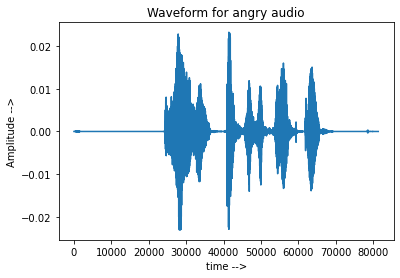

In [6]:

y_angry = librosa.load(angry[0])
y_angry_time = librosa.frames_to_time(y_angry[0])
plt.plot(y_angry_time)
plt.xlabel('time -->')
plt.ylabel('Amplitude -->')
plt.title('Waveform for angry audio')
plt.show()

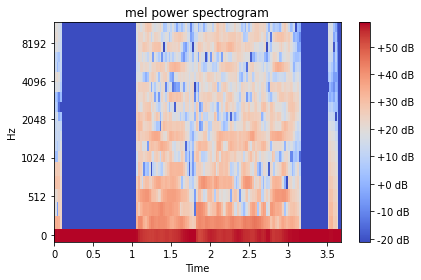

In [7]:
spec_angry = librosa.feature.mfcc(y_angry_time)
spec_angry = librosa.amplitude_to_db(spec_angry)

librosa.display.specshow(spec_angry, x_axis='time', y_axis='mel')


plt.title('mel power spectrogram')


plt.colorbar(format='%+02.0f dB')

plt.tight_layout()


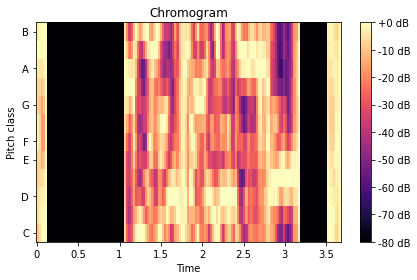

In [8]:
spec_angry = librosa.feature.chroma_stft(y_angry_time)
spec_angry = librosa.amplitude_to_db(spec_angry)
librosa.display.specshow(spec_angry, y_axis='chroma', x_axis='time')
plt.title('Chromogram')


plt.colorbar(format='%+02.0f dB')

plt.tight_layout()

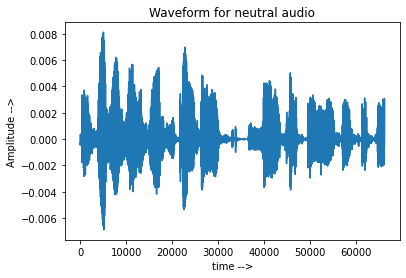

In [9]:
#neutral
y_neutral,sr = librosa.load(neutral[10])
y_neutral_time = librosa.frames_to_time(y_neutral)
plt.plot(y_neutral_time)
plt.xlabel('time -->')
plt.ylabel('Amplitude -->')
plt.title('Waveform for neutral audio')
plt.show()

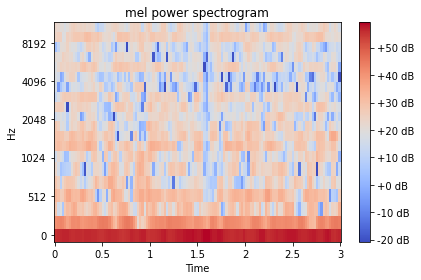

In [10]:
spec_neutral = librosa.feature.mfcc(y_neutral_time)
spec_neutral = librosa.amplitude_to_db(spec_neutral)
librosa.display.specshow(spec_neutral, sr=sr, x_axis='time', y_axis='mel')


plt.title('mel power spectrogram')


plt.colorbar(format='%+02.0f dB')

plt.tight_layout()

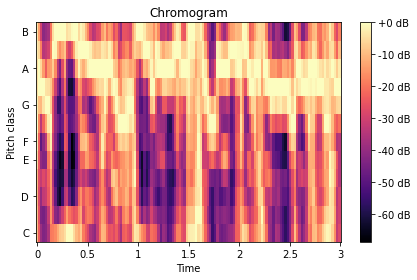

In [11]:
spec_neutral = librosa.feature.chroma_stft(y_neutral)
spec_neutral = librosa.amplitude_to_db(spec_neutral)
librosa.display.specshow(spec_neutral, y_axis='chroma', x_axis='time')
plt.title('Chromogram')


plt.colorbar(format='%+02.0f dB')

plt.tight_layout()

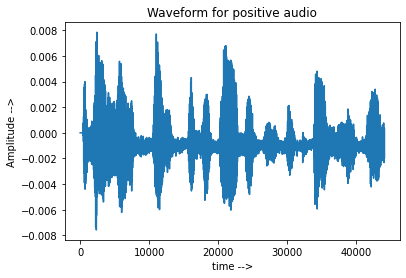

In [338]:
y_positive,sr = librosa.load(positive[0])
y_pos_time = librosa.frames_to_time(y_sad)
plt.plot(y_pos_time)
plt.xlabel('time -->')
plt.ylabel('Amplitude -->')
plt.title('Waveform for positive audio')
plt.show()

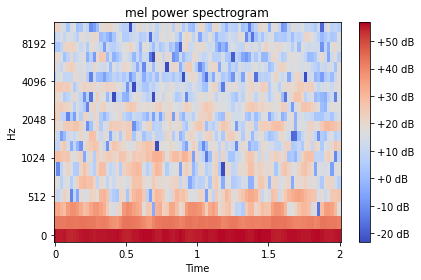

In [339]:
spec_pos = librosa.feature.mfcc(y_pos_time)
spec_pos = librosa.amplitude_to_db(spec_pos)
librosa.display.specshow(spec_pos, sr=sr, x_axis='time', y_axis='mel')

plt.title('mel power spectrogram')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()

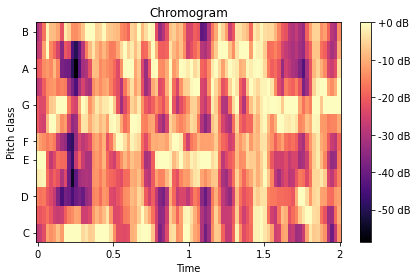

In [340]:
spec_pos = librosa.feature.chroma_stft(y_pos_time)
spec_pos = librosa.amplitude_to_db(spec_pos)
librosa.display.specshow(spec_pos, y_axis='chroma', x_axis='time')
plt.title('Chromogram')


plt.colorbar(format='%+02.0f dB')

plt.tight_layout()

In [343]:
emotions=[]
for item in positive:
    emotions.append("positive")
for item in negative:
    emotions.append("negative")
for item in neutral:
    emotions.append("neutral")

In [344]:
s_neg = 0
for i in range(len(emotions)):
    if(emotions[i]=='negative'):
        s_neg+=1
s_neg

150

In [345]:
s_neut = 0
for i in range(len(emotions)):
    if(emotions[i]=='neutral'):
        s_neut+=1
s_neut

160

In [346]:
s_pos = 0
for i in range(len(emotions)):
    if(emotions[i]=='positive'):
        s_pos+=1
s_pos

100

In [347]:
len(emotions)

410

In [348]:
data = {'Positive':s_pos, 'Neutral':s_neut, 'Negative':s_neg}
courses = list(data.keys())
values = list(data.values())

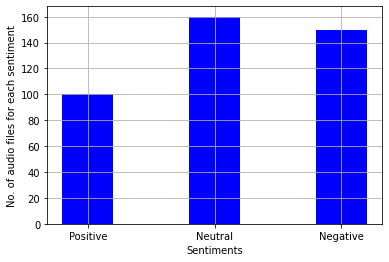

In [349]:
plt.bar(courses, values, color ='blue', width = 0.4)
plt.ylabel('No. of audio files for each sentiment')
plt.xlabel('Sentiments')
plt.grid()
plt.show()

In [350]:
def load_file(filepath):
    y,sr = librosa.load(filepath)
    return (y,sr)

In [351]:
def divide_segments(y_time,start):
    # divide into 50 ms segments
    # 50ms -> means 1111 samples    
    y_segmented = y_time[start:start+1111]
    return y_segmented

In [352]:
def stft(y_seg , sr, window, step):
    [f,f_name] = sf.feature_extraction(y_seg,sr, window, step,  deltas = False)
    return f

In [762]:
def feature_matricization(y_time):
    y_seg = divide_segments(y_time,0)
    y_stft = stft(y_seg,sr,0.05*sr,0.05*sr)
    y_stft = y_stft.reshape(34)
    
    start = 1111
    y_stfts = y_stft
    while(start <= len(y_time)-1111):
        y_seg = divide_segments(y_time,start)
        #print(y_seg)
        start += 2222
        y_stft = stft(y_seg,sr,0.05*sr,0.05*sr)
        #y_stft_arr = np.asarray(y_stft).T
        y_stft = y_stft.reshape(34)
        y_stfts = np.vstack((y_stfts, y_stft))
        #print(y_stft_arr.shape)

        #np.column_stack((y_stfts, y_stft_arr))
        
    if(len(y_stfts)<50):
        #cal how less
        x = 50 - len(y_stfts)%50
        zeros_arr = np.zeros(shape = (x,34))
        x_arr = np.asanyarray(y_stfts)
        x_arr = x_arr.reshape(-1,34)
        x_final = np.vstack((x_arr,zeros_arr))
        
        return x_final
    if(len(y_stfts)>=50):
        y_stfts = y_stfts[0:50]
        return np.asanyarray(y_stfts)

In [763]:
file_path = paths[0]
label = emotions[0]
labels = np.asarray(label)
y,sr = librosa.load(file_path)
y_time = librosa.frames_to_time(y)
feat = feature_matricization(y_time)
features = feat
for i in range(len(paths)):
    if(i!=0):
        #print(i)
        file_path = paths[i]
        label = emotions[i]
        labels = np.vstack((labels,label))
        y,sr = librosa.load(file_path)
        y_time = librosa.frames_to_time(y)
        feat = feature_matricization(y_time)
        features = np.vstack((features,feat))

In [764]:
type(features)

numpy.ndarray

In [765]:
features.shape

(20500, 34)

In [766]:
indices = features.shape[0]/50
indices

410.0

In [767]:
features_seg = np.split(features,indices)

In [768]:
len(features_seg[0][0])

34

In [769]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
le = LabelEncoder()
labels = to_categorical(le.fit_transform(labels))
labels

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [770]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features_seg,labels)

In [771]:
len(X_train)

307

In [772]:
len(X_test)

103

In [773]:
len(y_train)

307

In [774]:
len(y_test)

103

In [775]:
y_train.shape

(307, 3)

In [776]:
X_train_arr = np.asanyarray(X_train)
X_train_arr.shape

(307, 50, 34)

In [777]:
X_test_arr = np.asanyarray(X_test)
X_test_arr.shape

(103, 50, 34)

In [778]:
import tensorflow

In [779]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential,model_from_yaml

In [780]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [781]:
y_train = np.asarray(y_train).astype('float32').reshape(-1,3)
y_test = np.asarray(y_test).astype('float32').reshape(-1,3)

In [782]:
y_train[0].shape

(3,)

In [878]:
model = Sequential()
model.add(Conv1D(32,5,input_shape = (50,34)))
model.add(Conv1D(64,4))
model.add(MaxPooling1D(3))
model.add(Conv1D(128,2))
model.add(Dropout(0.1))
model.add(MaxPooling1D(2))
model.add((Conv1D(128,2)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.4))
model.add(Dense(3,activation='softmax'))

In [879]:
model.compile(optimizer='adam',loss=tensorflow.keras.losses.categorical_crossentropy,metrics = tensorflow.keras.metrics.categorical_accuracy)

In [880]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_104 (Conv1D)         (None, 46, 32)            5472      
                                                                 
 conv1d_105 (Conv1D)         (None, 43, 64)            8256      
                                                                 
 max_pooling1d_46 (MaxPoolin  (None, 14, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_106 (Conv1D)         (None, 13, 128)           16512     
                                                                 
 dropout_21 (Dropout)        (None, 13, 128)           0         
                                                                 
 max_pooling1d_47 (MaxPoolin  (None, 6, 128)           0         
 g1D)                                                

In [881]:
model.fit(X_train_arr, y_train,epochs = 20)

Epoch 1/20
10/10 [==============================] - 1s 12ms/step - loss: 3.0264 - categorical_accuracy: 0.3779
Epoch 2/20
10/10 [==============================] - 0s 16ms/step - loss: 1.1392 - categorical_accuracy: 0.5440
Epoch 3/20
10/10 [==============================] - 0s 14ms/step - loss: 0.8751 - categorical_accuracy: 0.6059
Epoch 4/20
10/10 [==============================] - 0s 13ms/step - loss: 0.6468 - categorical_accuracy: 0.7166
Epoch 5/20
10/10 [==============================] - 0s 18ms/step - loss: 0.6680 - categorical_accuracy: 0.7134
Epoch 6/20
10/10 [==============================] - 0s 13ms/step - loss: 0.7039 - categorical_accuracy: 0.6840
Epoch 7/20
10/10 [==============================] - 0s 15ms/step - loss: 0.5550 - categorical_accuracy: 0.7427
Epoch 8/20
10/10 [==============================] - 0s 18ms/step - loss: 0.5579 - categorical_accuracy: 0.7590
Epoch 9/20
10/10 [==============================] - 0s 21ms/step - loss: 0.4445 - categorical_accuracy: 0.7980
E

In [882]:
model.evaluate(X_train_arr, y_train)

10/10 [==============================] - 0s 4ms/step - loss: 0.1995 - categorical_accuracy: 0.9251


[0.19946403801441193, 0.9250814318656921]

In [883]:
model.evaluate(X_test_arr,y_test)

4/4 [==============================] - 0s 6ms/step - loss: 0.3769 - categorical_accuracy: 0.8252


[0.37691164016723633, 0.8252426981925964]

4/4 [==============================] - 0s 6ms/step


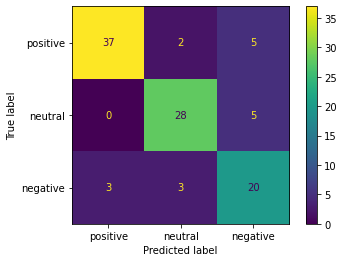

In [884]:
p = model.predict(X_test_arr)
cm = confusion_matrix(y_test.argmax(axis=1), p.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['positive','neutral','negative'])

disp.plot()
plt.show()

10/10 [==============================] - 0s 4ms/step


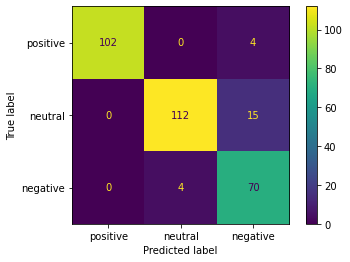

In [885]:
p = model.predict(X_train_arr)
cm = confusion_matrix(y_train.argmax(axis=1), p.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['positive','neutral','negative'])

disp.plot()
plt.show()

In [960]:
val_test = '../Downloads/Audio-Classification-master/Audio_data/test/angry.wav'

In [961]:
y_val,sr = load_file(val_test)

In [962]:
y_val_time = librosa.frames_to_time(y_val)

In [963]:
feat_matrix = feature_matricization(y_val_time)

In [964]:
feat_matrix = np.asanyarray(feat_matrix)

In [965]:
feat_matrix = feat_matrix.reshape(1,50,34)

In [966]:
feat_matrix.shape

(1, 50, 34)

In [967]:
y = model.predict(feat_matrix)

1/1 [==============================] - 0s 43ms/step


In [968]:
y = y.reshape(3)
y

array([9.8718041e-01, 6.8776671e-06, 1.2812759e-02], dtype=float32)

In [969]:
if(y[0]>y[2] and y[0]>y[1]):
    y[0]=1
    y[1]=0
    y[2]=0
elif(y[1]>y[2] and y[1]>y[0]):
    y[0]=0
    y[1]=1
    y[2]=0
else:
    y[0]=0
    y[1]=0
    y[2]=1

In [970]:
y = y.astype('int')

In [971]:
y

array([1, 0, 0])

In [972]:
print(le.classes_)

['negative' 'neutral' 'positive']


In [973]:
le.inverse_transform(y.reshape(3))

array(['neutral', 'negative', 'negative'], dtype='<U8')

In [902]:
val_test = '../Downloads/Audio-Classification-master/Audio_data/test/neutral_1.wav'

In [903]:
y_val,sr = load_file(val_test)

In [904]:
y_val_time = librosa.frames_to_time(y_val)

In [905]:
feat_matrix = feature_matricization(y_val_time)

In [906]:
feat_matrix = np.asanyarray(feat_matrix)

In [907]:
feat_matrix = feat_matrix.reshape(1,50,34)

In [908]:
feat_matrix.shape

(1, 50, 34)

In [909]:
y = model.predict(feat_matrix)
y

1/1 [==============================] - 0s 33ms/step


array([[6.3935464e-04, 9.9936002e-01, 6.2749831e-07]], dtype=float32)

In [910]:
y = y.reshape(3)

In [911]:
if(y[0]>y[2] and y[0]>y[1]):
    y[0]=1
    y[1]=0
    y[2]=0
elif(y[1]>y[2] and y[1]>y[0]):
    y[0]=0
    y[1]=1
    y[2]=0
else:
    y[0]=0
    y[1]=0
    y[2]=1

In [912]:
y

array([0., 1., 0.], dtype=float32)

In [913]:
print(le.classes_)

['negative' 'neutral' 'positive']


In [926]:
val_test = '../Downloads/Audio-Classification-master/Audio_data/test/positive.wav'

In [927]:
y_val,sr = load_file(val_test)
y_val_time = librosa.frames_to_time(y_val)
feat_matrix = feature_matricization(y_val_time)
feat_matrix = np.asanyarray(feat_matrix)
feat_matrix = feat_matrix.reshape(1,50,34)
y = model.predict(feat_matrix)
y = y.reshape(3)

1/1 [==============================] - 0s 63ms/step


In [928]:
if(y[0]>y[2] and y[0]>y[1]):
    y[0]=1
    y[1]=0
    y[2]=0
elif(y[1]>y[2] and y[1]>y[0]):
    y[0]=0
    y[1]=1
    y[2]=0
else:
    y[0]=0
    y[1]=0
    y[2]=1

In [929]:
y

array([0., 0., 1.], dtype=float32)

In [931]:
print(le.classes_)

['negative' 'neutral' 'positive']


In [919]:
model.save('model_82.h5')